# Problem Set 1 (20 + 40 + 30 = 90 points)

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

4. Some tasks in this assignment are bonus. It means that you can get maximum score for this assignment even if you ignore these tasks. However, if you get $y$ points for bonus tasks and $x$ points for regular tasks, then your score for the assignment will be $\min(90, x+y)$. If $x + y > 90$, then we will label your submission and take into account in the final grade releasing (e.g. in the border case).

## Problem 1. QR backpropagation (20 pts)

Our goal is to write an orthogonalization layer, that for an arbitrary rectangular matrix $A$ produces an orthonormal matrix $Q$ and (optionally) an upper triangualr matrix $R$ such that $A = QR$. 
In other words, we need to compute the QR decomposition.

There are problems when one need to optimize over orthogonal matrices, so using such layer can be a solution.

A standard algorithm to compute the QR decomposition is the Gram-Schmidt process.
For the linearly independent set of vectors $a_1,\dots,a_n$ (that are defined with the matrix $A$) it computes matrix $Q$ that contains orthonormalized set of vectors $q_1,\dots,q_n$.

This algorithm is listed below.

$$
\begin{split}
u_1 &= v_1, \\
u_2 &= v_2 - \frac{(v_2, u_1)}{(u_1, u_1)} u_1, \\
\dots \\
u_n &= v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}.
\end{split}
$$

Obtained $u_1, \dots, u_n$ are orthogonal vectors in exact arithmetics. Then to make the system orthonormal you should divide each of the vectors by its norm: $u_i := u_i/\|u_i\|$.

We have $A = QR$. 
Matrix $Q$ consists of vectors $u_1, \dots, u_n$. 
Now let's look at the matrix $R$. 

$Q^*A = R$. 
So $R_{i, j} = (u_i, v_j)$ (assuming $u_i$ is already normalized). 
And it is exactly what we see in Gram-Schmidt algorithm:

$$ v_n = \frac{(v_n, u_1)}{(u_1, u_1)} u_1 + \frac{(v_n, u_2)}{(u_2, u_2)} u_2 + \dots + \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1} + u_n.$$ 

This is the representation of vectors $v_i$ in our newly computed ortonormal basis. 
Thus they form matrix $R$. 
These coefficients are in the upper triangular part of $R$, because when $i>j$ we get $R_{i j} = 0$, because then we get sum of scalar products of orthogonal vectors. 

There is a more [computationally stable version of the Gram-Schmidt algorithm](https://en.wikipedia.org/wiki/Gram–Schmidt_process#Numerical_stability) that reduces the loss of orthogonality in matrix $Q$. 
This algorithm is called the modified Gram-Schmidt algorithm.

The loop of orthogonalization is the same, except for the computing the vector $u_k$ simultaneously:

$$ u_n = v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}
u_n$$

$$ 
 = v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1},
$$

one need to iteratively update $u_k$ step-by-step for a better numerical stability.

$$
\begin{split}
u_k &= v_k - \frac{(v_k, u_1)}{(u_1, u_1)} u_1, \\
u_k &= u_k - \frac{(u_k, u_2)}{(u_2, u_2)} u_2, \\
\dots \\
u_k &= u_k - \frac{(u_k, u_{k-1})}{(u_{k-1}, u_{k-1})} u_{k-1}. \\
\end{split}
$$


You are supposed to do the following tasks:

__1.__ (2 points) Implement the modified Gram-Schmidt algorithm in a function ```modified_gram_schmidt(A)``` using PyTorch.

__2.__ (1 point) Create a random matrix $A \in \mathbb{R}^{m \times n}$, $m \gg n$. For the arbitrary loss function, eg. $L(Q) = \sum_{i=0}^{m-1}\sum_{j=0}^{n-1} q_{ij}$, compute the gradient $\frac{\partial L}{\partial Q}$. Finally, compute $\frac{\partial L}{\partial A}$ using built-in PyTorch backpropagation through your implementation of QR decomposition (```modified_gram_schmidt(A)```).

__3.__ (2 points) Compute gradient $\frac{\partial L}{\partial A}$ using backpropagation through built-in PyTorch function for computing QR decomposition.

In [56]:
# install dependencies
#!pip install memory-profiler
import torch

def modified_gram_schmidt(A):
    """
    Computes QR decomposition of matrix A
    
    Input: 
        A - n x m matrix
    Output:
        Q - n x m orthonormal matrix
        R - m x m upper triangular matrix
    """
  
    n, m = A.shape
    Q = list()

    for i in range(m):
      for j in range(i+1):
        if j == 0:
          u_i = A[:,i]
        else:
          u_i = u_i - torch.dot(u_i, Q[j-1])/torch.dot(Q[j-1], Q[j-1])*Q[j-1]
      Q.append(u_i/torch.linalg.norm(u_i))
    Q = torch.cat([q.reshape(-1, 1) for q in Q], dim=1)
    R = Q.T@A

    return Q,R

m = 100
n = 20
A = torch.rand((m, n),requires_grad=True)

# Your code is below
Q1, R1 = torch.linalg.qr(A)
Q2, R2 = modified_gram_schmidt(A)

loss1 = Q1.sum()
loss2 = Q2.sum()

loss1.backward()
print("dL1/dA:\n", A.grad)
A.grad.zero_()
loss2.backward()
print("dL2/dA:\n", A.grad)

dL1/dA:
 tensor([[ 2.3313e-01,  2.2628e-01,  2.7831e-01,  ...,  5.4704e-02,
         -3.0309e-02,  3.5859e-02],
        [ 7.2272e-03, -7.5878e-03, -4.7511e-02,  ...,  1.7092e-02,
         -3.8636e-05, -3.1974e-03],
        [-3.1504e-02,  1.1253e-01,  1.6144e-01,  ...,  3.9938e-02,
         -3.7735e-02,  4.6096e-02],
        ...,
        [ 2.6759e-01,  1.8854e-02, -1.1238e-01,  ..., -3.7867e-02,
          7.3051e-02, -5.8373e-02],
        [-1.2563e-02, -5.0605e-02, -1.5257e-01,  ...,  3.2434e-02,
          2.2477e-02, -9.5427e-03],
        [ 1.6898e-01, -1.5896e-01, -1.4655e-01,  ...,  1.4712e-02,
         -1.8098e-02,  2.3081e-02]])
dL2/dA:
 tensor([[ 0.2992,  0.2522,  0.2349,  ..., -0.0365, -0.0304, -0.0359],
        [-0.1203, -0.0419, -0.0631,  ...,  0.0075,  0.0047,  0.0032],
        [ 0.1855,  0.0377,  0.0589,  ..., -0.0502, -0.0400, -0.0461],
        ...,
        [-0.4997, -0.2732, -0.2002,  ...,  0.0398,  0.0323,  0.0584],
        [-0.0930, -0.0129,  0.0058,  ..., -0.0011, -0.002

__4.__ (13 points total) Write the backpropagation $\frac{\partial L}{\partial A}$ from scratch with PyTorch. Do not forget to use ```requires_grad=False``` to disable PyTorch autograd accumulation of the gradient.

  a) (2 points) Derive analytically the gradient $\frac{\partial y}{\partial x}$ of vector normalization operation $y := x/\|x\|$.

  b) (1 point) Implement backward through the vector normalization operation (can be implemented either in the function ```backward_normalization``` or further inside the code).

  c) (2 points) Derive analytically the gradient $\frac{\partial u_k}{\partial v_j}$ of the othonormalization operation:

$$
\begin{split}
u_k &= v_k - \frac{(v_k, u_1)}{(u_1, u_1)} u_1, \\
u_k &= u_k - \frac{(u_k, u_2)}{(u_2, u_2)} u_2, \\
\dots \\
u_k &= u_k - \frac{(u_k, u_{k-1})}{(u_{k-1}, u_{k-1})} u_{k-1}. \\
\end{split}
$$

  d) (2 points) Implement backward through the othonormalization operation (can be implemented either in the function ```backward_orthogonalization``` or further inside the code).

  e) (1 point) Implement the QR forward pass (almost identically to ```modified_gram_schmidt```, but with storing the additional data nesessary for backpropagation) with the method ```forward``` of class ```QR``` (see template below).

  f) (5 points) Implement the QR backward pass using previously implemented functions and place it in the method ```backward``` of class ```QR```  (see template below).

__5.__ (2 points) Look at obtained $Q$ and $R$ matrices for each approach (steps 2, 3, 4), verify that $A \approx QR$ and $Q^TQ \approx I$. Measure the required memory for backpropagation (eg. with ```memory_profiler```). 
Compare the results of three approaches: 

- gradient from the PyTorch built-in function
- gradient from PyTorch autograd applied to your function ```modified_gram_schmidt```
- your custom implementation of backward step from analytical expressions. 

Compare the theoretical asymptotics of the memory usage for the backpropagation of the modified Gram-Schmidt algorithm with every approach listed above. 
What data is needed for backpropagation and thus affects the memory consumption?

### Your solution
$\frac{\partial y}{\partial x} = \frac{\partial}{\partial x}\frac{x}{\|x\|} = \frac{\|x\|-\frac{x^T}{\|x\|}x}{\|x\|^2} = \frac{I_n-\frac{x^Tx}{\|x\|^2}}{\|x\|}$

$\frac{\partial u_k}{\partial v_j} =
\begin{cases}
\prod_{i=1}^{k-1}(I_n-\frac{u_i u_i^T}{(u_i,u_i)}), & \text{if}\ k=j \\
-\sum_{i=1}^{k-j}\left[\frac{u_{k-i} u_k^{(j-i-1)T}}{(u_{k-i}, u_{k-i})}-2\frac{(u_{k-i},u_k^{(j-i-1)})}{(u_{k-i}, u_{k-i})^2}u_{k-i} u_{k-i}^T+\frac{(u_{k-i},u_k^{(j-i-1)})}{(u_{k-i}u_{k-i})}I_n\right] \prod_{l=1}^{i-1}(I_n-\frac{u_{k-l} u_{k-l}^T}{(u_{k-l},u_{k-l})})\frac{\partial u_{k-i}}{\partial v_j}, & \text{if}\ k>j \\
0 , & \text{if}\ k<j
\end{cases}$

In [57]:
def product(x):
    return x.reshape(-1, 1)@x.unsqueeze(0)

def backward_normalization(x):
    # Your code 
    x_norm = torch.linalg.norm(x)
    return (torch.eye(x.shape[0]) - product(x)/x_norm**2)/x_norm


def backward_orthogonalization(qr, grad_out, j, k):
    # Your code
    m, n = grad_out.shape
  
    if k==j:
        res = torch.eye(m)
        for i in range(k):
            u_i = qr.U[i]
            res = res@(torch.eye(m)-product(u_i)/(u_i@u_i))
            
    elif k>j:
        res = torch.zeros((m, m))
        for l in range(k-j):
            u_j = qr.U[k-l-1]
            u_k = qr.iter_all[k][k-l-1]
            
            left = -(u_j.reshape(-1, 1)@u_k.unsqueeze(0)/(u_j@u_j)- 2*(u_j@u_k)/((u_j@u_j)**2)*product(u_j)+(u_j@u_k)/(u_j@u_j)*torch.eye(m)) 

            right = torch.eye(m)
            for i in range(0, l):
                u_i = qr.U[k-i-1]
                right = right@(torch.eye(m)-product(u_i)/(u_i@u_i))
            right = right@left
            right = right@qr.grad[k-l-1, j, :, :]
            res = res + right
    else: 
        res = torch.zeros((m, m))
    return res

class QR():
    def __init__(self):
        self.iter_all = []
        self.grad = None
        
    def forward(self, A):
        """
        Computes QR decomposition of matrix A

        Input: 
            A - n x m matrix
        Output:
            Q - n x m orthonormal matrix
            R - m x m upper triangular matrix
        """

        self.Q = list()
        self.U = list()
        m, n = A.shape
        self.grad = torch.zeros((n, n, m, m))
        for i in range(0, n):
            iter_list = list()
            for j in range(i+1):    
                if j == 0:
                    u_i = A[:, i]
                else:
                    u_i = u_i - torch.dot(u_i, self.Q[j-1])/torch.dot(self.Q[j-1], self.Q[j-1])*self.Q[j-1]
                iter_list.append(u_i)
            self.Q.append(u_i/torch.linalg.norm(u_i))
            self.U.append(u_i)
            self.iter_all.append(torch.cat([torch.unsqueeze(q, 0) for q in iter_list], dim = 0))
        self.Q = torch.cat([q.reshape(-1, 1) for q in self.Q], dim=1)
        self.R = self.Q.T@A
        return self.Q, self.R
    
        

    def backward(self, grad_output):
        """
        Computes QR decomposition of matrix A

        Input: 
            grad_output - n x m matrix, derivative of the previous layer (derivative of loss dL/dQ  in our case)
        Output:
            grad_input - n x m derivative dL/dA
        """
        
        normalization_grad = [backward_normalization(x) for x in self.U]
        orthogonalization_grad = list()
        m, n = grad_output.shape
        for j in range(n):
            grad = torch.zeros((1, m))
            for k in range(n):
                res = backward_orthogonalization(self, grad_output, j, k)
                self.grad[k, j, :, :] = res
                grad = grad+(grad_output[:, k].unsqueeze(0)@normalization_grad[k]@res)
            orthogonalization_grad.append(grad)
        grad_input = torch.cat([q.reshape(-1, 1) for q in orthogonalization_grad], dim=1) 
        return grad_input

In [58]:
qr = QR()
A = torch.rand((m, n))

Q, R = qr.forward(A)
loss1 = Q.sum()

# TODO compute losses and do backpropagation
# compute dL / dQ and finally dL / dA
dL_dQ = torch.ones((m, n))
dL_dA = qr.backward(dL_dQ)


A_autograd = A.clone().detach().requires_grad_(True)
Q_autograd, R_autograd = qr.forward(A_autograd)
loss2 = Q_autograd.sum()
loss2.backward()
print('Loss:', torch.linalg.norm(dL_dA - A_autograd.grad).float())

Loss: tensor(9.0269e-06)


### Bonus tasks

__6.__ (10 points) Modify the previous code to be memory-efficient. 

Hint: not all intermediate variables need to be stored for backpropagation.

__7.__ (3 points) Again, measure the required memory for backpropagation. Explain the theoretical asymptotics of the memory usage for the memory-efficient backpropagation.

In [ ]:
# Your solution is here

## Problem 2. Voice classification (40 pts)

In this assigment you will have a chance to develop a voice-anti-spoofing algorithm, enhancing your skills in standard PyTorch classificaton development pipeline.

There are several types of attack: 
- replay attacks, when one records and repeats someone's voice, 
- impresario attacks, when the speaker mimics the target's voice like an actor and 
- the most interesting are deepfake attack, based on text-to-speech, voice cloning and voice conversion algorithms. 

In this work we will focus on deepfake attack and try to differ them from genuine (or bona-fide) speech.

We will use data, provided by organisers of biannual [ASVspoof](https://www.asvspoof.org/) contest. More precisely, we will take subpart `ASVspoof_2019LA` dataset, which consist of 17 different attacks DF attack types and bona-fide. All recordings were augmented to be close to real telephone recordings. We will not take 2021 data, but if you want, you can use 2021 data as test and 2019 data as train and validation.

The initital dataset can be downloaded from [here](https://datashare.ed.ac.uk/handle/10283/3336). However, we [provide you smaller subsample](https://drive.google.com/drive/folders/1-CyCFA3komqrtyoYj21y5gzfh_vcKBYx?usp=share_link) of dev (val) and eval (test) parts to make work in colab relatively possible :) . You can download it locally or put into you Drive. You will need around 3GB free space, think about creating a new account if you don't have enough.

We encourage you to look through data [overview](https://datashare.ed.ac.uk/bitstream/handle/10283/3336/asvspoof2019_evaluation_plan.pdf?sequence=1&isAllowed=y) and result summary [paper](https://datashare.ed.ac.uk/bitstream/handle/10283/3336/asvspoof2019_Interspeech2019_submission.pdf?sequence=2&isAllowed=y).

One important thing to notice: main application of this algorithms is in voice-biometry, when we want to stop illegal intruder. Thus, there are two (or 3) common ways of developing VAS algorithms: speaker-aware, we we train verification model which is sensitive to spoofing and differs bona-fide and impostor or we combinde verification score and score of VAS model to decide, whetherr the person is the same, and finally simple and general countermeasures setup, when given audio and model should predict whether it is a spoof or bona-fide. We will work on the last setup.

**Important: feel free not to use pre-defined functions, you can solve the task as you wish or change functions/pipelines significantly.** 

#### Preparations
It is a good practice to log and check you experiments. In this assignemnt, we ask you to sign up in wandb, log your experiments and give us a link to your project and attach plots/report in the notebook with your solution.

In [1]:
!pip install wandb

import copy
import os
import sys
import datetime,time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import IPython.display as ipd
from typing import Optional
import torch
import torch.nn as nn
import torchaudio
import librosa
import sklearn.metrics as metrics
import wandb
from torchvision import transforms
from torchvision.models import resnet50, resnet18
from torch.utils.data import Dataset, DataLoader
from torchaudio.utils import download_asset
from torch.nn.functional import sigmoid
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import torchaudio.functional as F

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=bd2d04dabab14fcc945558910d9bd17a3d285902658d405d1e0dd1a61f79452e
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


In [2]:
# https://wandb.ai/quickstart

!wandb login 4a7bbd27fd9d002abe749ec805d28d45d57f0348

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [3]:
wandb.init(project="voice-anti-spoofing", name = "test_run", tags = ["SmallModel", "LA"])
SEED = 42  # do not change it
# mount drive if you wish

from google.colab import drive
drive.mount('/content/drive/')


wandb: Currently logged in as: ivanzo17898. Use `wandb login --relogin` to force relogin


Mounted at /content/drive/


In [5]:
%cd /content/drive/MyDrive/
!ls for_collab

/content/drive/MyDrive
ASVspoof2019_LA_cm_protocols  df_eval.csv   flac_dev   README.LA.txt
df_dev.csv		      df_train.csv  flac_eval  train_flac


In [11]:
 os.chdir('./for_collab')
 path = os.getcwd()

In [12]:
# to make dataframes
path_la_train = os.path.join(path,"ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt")
path_la_dev = os.path.join(path,"ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt")
path_la_eval = os.path.join(path,"ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt")

flac_la_train = os.path.join(path,"train_flac/")
flac_la_dev = os.path.join(path,"flac_dev/")
flac_la_eval = os.path.join(path,"flac_eval/")

In [13]:
columns = ["speaker_id", "audio_file_name", "system_id", "skip", "class"]
df = pd.read_csv(path_la_train, sep=" ", header=None)
df.columns = columns
df.head()

,speaker_id,audio_file_name,system_id,skip,class
0,LA_0079,LA_T_1138215,-,-,bonafide
1,LA_0079,LA_T_1271820,-,-,bonafide
2,LA_0079,LA_T_1272637,-,-,bonafide
3,LA_0079,LA_T_1276960,-,-,bonafide
4,LA_0079,LA_T_1341447,-,-,bonafide


In [14]:
def makedf_ultimate(txt_file_path, flac_path, dataset_name='ASVspoof', data_type='LA', year=2019):
    
    if dataset_name=='ASVspoof':
        name = dataset_name+str(year)+data_type
        if data_type=='DF':
            attack_name = 'deepfake'
        elif data_type=='LA':
            attack_name = 'deepfake'
        else:
            attack_name = 'replay'
            
        df = pd.read_csv(txt_file_path, sep=" ", header=None)

            
        if year == 2019:
            df.columns = ["speaker_id", "audio_file_name", "system_id", "skip", "class"]
            df['dataset'] = name
            di = {'bonafide':0, 'spoof':1} # assign classes

            df['class'] = df['class'].map(di)
            # m = df['class'] == 0
            # df.loc[m, 'attack'] = 'noattack'
            df['audio_path'] = flac_path + df['audio_file_name'] + '.flac'
            df = df[["speaker_id", "audio_path", "class"]]
        
    # df = df[['audio_path', 'class', 'dataset', 'attack']]
    df = df[["speaker_id", "audio_path", "class"]]
    df = df.reset_index(drop=True)
    return df

In [15]:
df_train = makedf_ultimate(path_la_train, flac_la_train, year=2019, data_type='LA')
df_dev = makedf_ultimate(path_la_dev, flac_la_dev, year=2019, data_type='LA')
df_eval = makedf_ultimate(path_la_eval, flac_la_eval, year=2019, data_type='LA')

**Task 1.1 (2 points)** Check data distribution. Is it imbalanced? How are you going to deal with it?

Hints: upsampling, downsampling, add new data, e.g. from this [source](https://commonvoice.mozilla.org/) (but will new audios have the same distribution?), or adjust loss functions.

**Answer**

I'll adjust loss function weights

In [16]:
df_train['class'].value_counts()

1    22800
0     2580
Name: class, dtype: int64

In [17]:
# for dev and eval, let's simplify the task and use smaller amount of data, but balanced to better understand metrics
# we need this functions, because it removes unuploaded data from our dataframes
def balanced_split(df):
    k = min(len(df[df['class']==0]), len(df[df['class']==1]))
    print(k)
    df_bf = df[df['class']==0].sample(frac=1, random_state=SEED).iloc[0:k]
    df_spoof = df[df['class']==1].sample(frac=1, random_state=SEED).iloc[0:k]

    df_bf = df_bf.append([df_spoof], ignore_index=True)
    df_bf = df_bf.reset_index(drop=True)
    return df_bf

df_eval = balanced_split(df_eval)
df_dev = balanced_split(df_dev)

7355
2548


<ipython-input-17-295d12be0fb0>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bf = df_bf.append([df_spoof], ignore_index=True)


In [18]:
# for audio manipulations we advise you to use torchaudio or librosa
x, sr = librosa.load(df_eval["audio_path"].iloc[0])

In [19]:
ipd.display(ipd.Audio(x, rate=sr))

**Task 1.2. (1 point)** Display several spoof and bona-fide audios. Can you hear the difference?

In [20]:
print('spoof')
audio = [torchaudio.load(path) for path in df_train[df_train['class']==1]['audio_path'].iloc[0:5]]
[ipd.display(ipd.Audio(x, rate = sr)) for (x, sr) in audio]

print('bona-fide')
lz = [torchaudio.load(path) for path in df_train[df_train['class']==0]['audio_path'].iloc[0:5]]
[ipd.display(ipd.Audio(x, rate = sr)) for (x, sr) in audio];

spoof


bona-fide


### Custom dataset and Model

You can find inspiration and hints in 
- https://pytorch.org/audio/stable/tutorials/audio_feature_extractions_tutorial.html
- https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html
- https://pytorch.org/tutorials/beginner/fgsm_tutorial.html
- https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
- https://pypi.org/project/audiomentations/ 
- https://pytorch.org/audio/stable/tutorials/audio_data_augmentation_tutorial.html
- and any other blogposts about spectrograms

**Task 2.1 (5 points)** We can work with audios as with images, transforming into spectrograms. Here your task is to implement simple model, which receives raw wav (amplitudes, but probably already preprocced in dataset), transforms it into mel-spectrogram, changes amplitude to DB scale (if you want) and then procceses through the layers. You are free to use ready pre-trained backbones, e.g. from `torchvision.models` and fine-tune them. However, if you want to practise more, create something on your own. Large models with `requires_grad=True` for all parameters will probably result in problems on training in colab. 

In [21]:
class WavResNet(nn.Module):
    def __init__(self, classes=None, resample=16000, n_mels=80, melspec_config=None):
        super().__init__() 
        
        self.fbank = torchaudio.transforms.MelSpectrogram(n_mels=n_mels)
        self.to_db = torchaudio.transforms.AmplitudeToDB()
        
        model = resnet18()
        model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3,bias=False)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs,classes)
        self.network = model
        # or create your own layers and use them in forward pass
        
    
    def forward(self, x, wav_lens: Optional[torch.Tensor]=None):  # can check the length if you want. this is helpful for inference     

        mels = self.fbank(x)
        mels_db = self.to_db(mels)
        out = self.network(mels_db)
        
        return out

**Task 2.2 (1 point)**
In your opinion, which approach is better for binary classification: 
- Model's last layer output has shape 1, train with BCE-like loss.
- Model's last layer output has shape 2, train with cross-entropy like loss. 

For binary classification it is preferable to use BCE-like loss, but we also can (and will) use CrossEntropy loss for  (multi) 2-class classification 

**Task 2.3 (3 points)** Create custom dataset, which recieves ```df``` and returns preprocessed audio.

**Task 2.4 (1 point)** Should we use augmentaions? If yes, which ones? 

Generally, it is better to use augmentation, like background noise, RIR, Codec etc.  


In [22]:
class DatasetWav(Dataset):

    def __init__(self, data_frame, padding_sec=4, default_sr=16000, transform=None):
        self.df = data_frame
        self.padding_sec = padding_sec
        self.default_sr = default_sr
        self.labels = data_frame['class']
        self.paths = data_frame['audio_path']
        self.transform = transform
        #self.vad = ...   # in this task you are free to ommit it in order to speed up calculations,
                         # also the provided data should be rather clean
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        label = self.labels.iloc[idx]
        path = self.paths.iloc[idx]
        waveform , sr = torchaudio.load(path,normalize=True) # normalize=True
        # transform waveform from stereo to mono channel 
        waveform = torch.mean(waveform, dim=0)
        resample_transform = torchaudio.transforms.Resample(orig_freq=sr, new_freq=self.default_sr) # should we use it for our data or can ommit? 
        waveform = resample_transform(waveform)
        
        # waveform = self.vad(waveform)
        
        # came up with idea, what to do if audio is longer or shorter than reuqired
            
        if (len(waveform) < self.padding_sec * self.default_sr):
            waveform = torch.cat([waveform.unsqueeze(0), torch.zeros((1, (self.padding_sec * self.default_sr-len(waveform))))], dim = 1)   
        else:
            waveform = waveform[:self.padding_sec * self.default_sr].unsqueeze(0)
            
        return waveform, label

In [23]:
# check that works
batch_size = 10

df_samp = df_train.sample(frac=1).iloc[0:200].reset_index()
train_dataset_wavs = DatasetWav(df_samp
                               ) #.iloc[0:200]
train_dataloader_wavs = DataLoader(train_dataset_wavs, batch_size=batch_size, shuffle=True)
x, y = next(iter(train_dataloader_wavs))
model = WavResNet(classes=2)
model(x)

tensor([[-0.5040, -0.2429],
        [-0.4919, -0.3581],
        [-0.7044, -0.0715],
        [-0.6597, -0.0013],
        [-0.6298, -0.1082],
        [-0.7838, -0.1370],
        [-0.6541, -0.3738],
        [-0.7708, -0.3068],
        [-0.5025, -0.2915],
        [-0.6738, -0.3421]], grad_fn=<AddmmBackward0>)

### Train and Test functions
**Task 3.0 (1 point)** What is the difference between `model.train()` and `model.eval()`? Does `model.eval()` mode take gradient statisitcs into account?

**Task 3.1 (5 points)** Implement train and test functions, which iterate over all batches. Do logging of loss, accuracy on each batch and after every epoch. Check equal error rate EER, explain, what is it.

In [24]:
def calculate_eer(y, y_score):
    fpr, tpr, thresholds = roc_curve(y, y_score, pos_label=1)
    eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    thresh = interp1d(fpr, thresholds)(eer)
    return eer, thresh

In [25]:
def run_epoch(model, dataloaders, criterions, scheduler, optimizer, device, mode):

    total_test_loss = 0
    total_test_acc = 0
    total_train_loss = 0
    
    if mode == 'train':
        model.train()
        criterion = criterions[mode]
    else:
        model.eval()
        criterion = criterions[mode]
        
    for i, batch in tqdm(enumerate(dataloaders[mode])):
        inp = batch[0].to(device)
        target = batch[1].to(device)
        logits = model(inp)
        
        if mode == 'train':
            optimizer.zero_grad()
            loss = criterion(logits,target)
            loss.backward()
            optimizer.step()
            if scheduler!=None:
                scheduler.step(optimizer)
            total_train_loss += loss.item()
            
        if mode == 'val':
            loss = criterion(logits,target)
            prob = nn.functional.softmax(logits, dim=1)
            res = prob[:, 1].cpu().detach().numpy()
            target = target.cpu().detach().numpy()
            eer, thresh = calculate_eer(target, res)
            y_pred = np.where(res>=thresh,1,0)
            total_test_loss += loss.item()
            total_test_acc += (y_pred==target).sum()

    average_test_loss = total_test_loss / len(dataloaders['val'].dataset)
    average_test_acc = total_test_acc / len(dataloaders['val'].dataset)
    average_train_loss = total_train_loss / len(dataloaders['train'].dataset)
    
    if mode == 'train':
        print('** Accumulated average train loss = %f **' % average_train_loss)
    if mode == 'val':
        print('** Accumulated average val loss = %f **' % average_test_loss)
        print('** Accumulated average val accuracy = %f **' % average_test_acc)
    return model, average_test_acc, average_test_loss



def train(model, dataloaders, criterions, optimizer, 
          num_epochs=3, scheduler=None, savename=None,
          print_counter=10, decay_factor=10,
          device=torch.device("cuda")):

    print(f'Using {device} device')
    val_acc_history = []
    val_loss_history = []
    model.to(device)
    
    for epoch in range(1,num_epochs+1):
        print('\n' + '-'*40)
        print(f'Epoch: {epoch}')
        print(f'Run training...')
        for mode in ['train','val']:
            model, acc, loss = run_epoch(model, dataloaders, criterions, scheduler, optimizer, device, mode)
            if mode == 'val':
                val_loss_history.append(loss) 
                val_acc_history.append(acc)
        
        if epoch%5 == 0:
            save_checkpoint(epoch,model,optimizer,Loss,Acc,os.getcwd())
    return model, val_acc_history, val_loss_history

def test(model,dataloader,criterion,device=torch.device('cuda')):
    
    model.eval()
    with torch.no_grad():
        total_loss = 0
        total_acc = 0
        for batch in tqdm(dataloader):
            inp = batch[0].to(device)
            target = batch[1].to(device)
            logits = model(inp)
            y_pred = torch.argmax(logits, dim=1)
            total_acc += (y_pred==target).sum().item()


    average_acc = total_acc / len(dataloader.dataset)
    print('*Test accuracy = %f **' % average_acc)

    return inp, target, y_pred

### Main loop 

**Task 4.1 (3 points)** What loss will you choose and why? What it should receive for input (logits, probs)? Explain your answer.
Consider also:
- https://medium.com/swlh/focal-loss-what-why-and-how-df6735f26616
- https://libauc.org/


**Task 4.2 (5 points)** Implement main function, which receives yaml or json config (or path to it) and train and test the model, save model checkpoints, and model's test predictions. At least, you should obain results better than random. It is good, if accuracy on test dataset is >= 0.75.

In [49]:
def save_checkpoint(epoch, model,model_dir_path):
    save_path = os.path.join(model_dir_path, f'cpkt_{epoch}_epoch')
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
    }, save_path)
    print(f'Saved checkpoint to {save_path}')

In [40]:
cfg = {
    'lr':0.001,
    'epochs':1,
    'batch_size':250,
    'optimizer': torch.optim.Adam(model.parameters(), lr=0.001),
}

In [43]:
import torch.optim.lr_scheduler as lr_scheduler
def main(cfg):

    lr = cfg['lr'] 
    epochs = cfg['epochs']
    batch_size = cfg['batch_size']

    wandb.init(project="voice-anti-spoofing", name = "fin_run", tags = ["ResNet", "LA"])
    wandb.config = {
      "learning_rate": lr,
      "epochs": epochs,
      "batch_size": batch_size
    }

    
    # debug firstly on small subpart of dataset
    train_dataset_wavs = DatasetWav(df_train.sample(frac=1).reset_index().iloc[0:df_train.shape[0]//3]) #.iloc[0:200]
    train_dataloader_wavs = DataLoader(train_dataset_wavs, batch_size=batch_size, shuffle=True)
    val_dataset_wavs = DatasetWav(df_dev.sample(frac=1).reset_index().iloc[0:df_dev.shape[0]//3])
    val_dataloader_wavs = DataLoader(val_dataset_wavs, batch_size=batch_size, shuffle=True)
    test_dataset_wavs = DatasetWav(df_eval.sample(frac=1).reset_index().iloc[0:df_eval.shape[0]//3])
    test_dataloader_wavs = DataLoader(test_dataset_wavs, batch_size=batch_size, shuffle=True)
    dataloaders = {"train": train_dataloader_wavs, "val": val_dataloader_wavs}
    
    
    device = torch.device('cuda')
    classes = 2                                          
    model = WavResNet(classes=classes)                                                                            
    model = model.to(device)
    # freeze layers except the last one if you want
    #for param in model.parameters():
    #    param.requires_grad = ...
    #model.network.fc.requires_grad_(...)
                                                                                           
    optimizer = cfg['optimizer']
    x = df_train['class'].value_counts()
    sc = (torch.tensor(x)/sum(x)).to(device) # weights for loss
    criterion_train = nn.CrossEntropyLoss(weight=sc)
    criterion_test = nn.CrossEntropyLoss()
    criterions = {'train': criterion_train, 'val': criterion_test}
    
    #for_ckpts = "."
    #os.makedirs(for_ckpts, exist_ok=True)
    
    model, acc_history, loss_history = train(model,dataloaders,criterions,optimizer,num_epochs=epochs)
    
    inp, target, y_pred = test(model,test_dataloader_wavs,criterion_test)
    #test_loss, test_acc = test(model,test_dataloader_wavs,criterion,device=device)
    
    #return y, probs
    wandb.log({
        "acc": acc_history, 
        "loss": loss_history,
          })
    return model,acc_history, loss_history,inp, target, y_pred

#y, probs = main()
model,acc_history, loss_history,inp, target, y_pred = main(cfg)

Using cuda device

----------------------------------------
Epoch: 1
Run training...


34it [1:19:48, 140.85s/it]


** Accumulated average train loss = 0.002846 **


7it [17:42, 151.82s/it]


** Accumulated average val loss = 0.002930 **
** Accumulated average val accuracy = 0.524146 **


 10%|█         | 2/20 [05:15<47:22, 157.94s/it]


KeyboardInterrupt: ignored

Training might require a long time. So, you can try to use subpart of the dataset to receive rather good results. Also, you don't have to train for many epochs, 1 or even a half of epoch might be enough. Also consider to make some speedups in the model and dataset.

Colab also might work unstable with lots of data. If this happens, think how to deal with it, e.g. restart the kernel and/or remove the majority of data from Drive and try to bugfix firstly, then do train and test separately. 



**Task 4.3 (5 points)** Analyze the results. Play some audios with wrong predictions. Plot prediction distributions vs class. Is it possible to find better threshold?

**Task 4.4 (5 points)** Discuss the results and your approaches + hyperparameters. If you can, run some experiments with different parameters.

 Write your ideas, what else you can try to improve the results in the future.
 To improve the results:
 1. train more epochs
 2. tune hyperparameters
 3. perhaps, add augmentation

**Task 4.5 (3 points)** Provide link to wandb project, or link to report. Upload best model's weights to Drive and provide a link with access right.


In [51]:
# Your solution is here
save_checkpoint(1, model,'/content/drive/MyDrive')
#https://drive.google.com/file/d/1HHNMenpUpbwsixp4_CCFF8Difj4hfjp7/view?usp=share_link

Saved checkpoint to /content/drive/MyDrive/cpkt_1_epoch


**Bonus task. (50 points)** 

So far, we didn't care about speaker_id and verification. Take verification model from whatever you want and create counter measure subnetwork, as described in this [article](https://sasv-challenge.github.io/pdfs/2022_descriptions/IDVoice.pdf). Train the model, as described there. ASVspoof also provides Enrollment(anchor) recordings. Try to make blending, to obtain better metrics for counter measures.

These links might be helpful:
- https://github.com/archinetai/surgeon-pytorch
- https://www.kaggle.com/code/peter0749/additive-margin-softmax-loss-with-visualization

## Problem 3. (30 pts)

### Task 1 (10 pts)

For FCNN (Fully connected Neural Networks)
\begin{equation}
f(x)=f_k\left(f_{k-1}\left(\ldots\left(f_0(x)\right)\right),\right.
\end{equation}
assume the nonlinearity function $\sigma$ is ReLU and loss function $L$ is squared error loss function.
Prove that the deep learning model is not unique for any datasets, i.e. the optimization problem 
\begin{equation}
\min_\theta \ g(\theta)=\frac{1}{N} \sum_{i=1}^N L\left(y_i, \hat{y}_i\right), \text{where} \ \ \hat{y}_i=f\left(x_i, \theta\right),
\end{equation} 
dose not have an unique global minimizer $\theta$.

### Task 2 (5 pts)

The *softmax* activation function is 
\begin{equation}
\mathrm{Softmax}(\mathbf{z})_i=\frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \ \text { for } \  i=1, \ldots, K \text { and } \mathbf{z}=\left(z_1, \ldots, z_K\right) \in \mathbb{R}^K.
\end{equation}
Suppose $\mathbf{z} \in \mathbb{R}^K$, and $\mathbf{a} \in \mathbb{R}^K$,
Prove that for the optimization problem
\begin{equation}
\begin{aligned}
& \min_{\mathbf{a}} \ -\langle\mathbf{a}, \mathbf{z}\rangle+\langle\mathbf{a}, \log \mathbf{a}\rangle \\
& \text { s.t. } \sum_k^K \mathbf{a}_{k}=1,
\end{aligned}
\end{equation}
the minimizer is 
\begin{equation}
\mathbf{a}^*=\mathrm{Softmax}(\mathbf{z}).
\end{equation}

*Hint*: KKT optimality conditions and convexiy of the problem can help you to show the required equality

### Solution

$ \min \limits_a -\langle\mathbf{a}, \mathbf{z}\rangle+\langle\mathbf{a}, \log \mathbf{a}\rangle = \min \limits_a -\sum \limits_i^K a_i z_i + \sum \limits_i^K a_i log(a_i) $

Let's construct Lagrange function:

$L = -\sum \limits_i^K a_i z_i + \sum \limits_i^K a_i log(a_i) + \lambda (\sum \limits_i^K a_i - 1)$

$\frac{\partial L}{\partial a_k} = -z_k  + 1 + log(a_k) + \lambda = 0$

Then $ \lambda = z_k - log(a_k) - 1$

$z_k - log(a_k) - 1 = z_i - log(a_i) - 1$ 

$log(a_k)-log(a_i) = z_k = z_i$

$log(\frac{a_k}{a_i}) = z_k - z_i$ 

=> $\frac{a_k}{a_i} = e^{z_k - z_i}$

Recall constraints:  
$\sum \limits_k^K a_k = 1$ => $\sum \limits_k^K \frac{a_k}{a_i} = \frac{1}{a_i}= \sum \limits_k^K e^{z_k - z_i}$
=> $a_i = \frac{1}{\sum \limits_k^K e^{z_k - z_i}} = \frac{e^{z_i}}{\sum \limits_k^K e^{z_k}} = Softmax(z)_i $

So $\mathbf{a}^*=\mathrm{Softmax}(\mathbf{z})$
### Task 3 (15 pts)

For function $f(x)=x^2, x \in \left[0, 1\right]$, 

1) prove that the neural network $\hat f(x)$ based on the following structure has the approximation error 
\begin{equation}
|f(x)-\hat f(x)|\leq \frac{1}{2^{n-1}}
\end{equation}
where $n$ is the number of layers in the nural network.

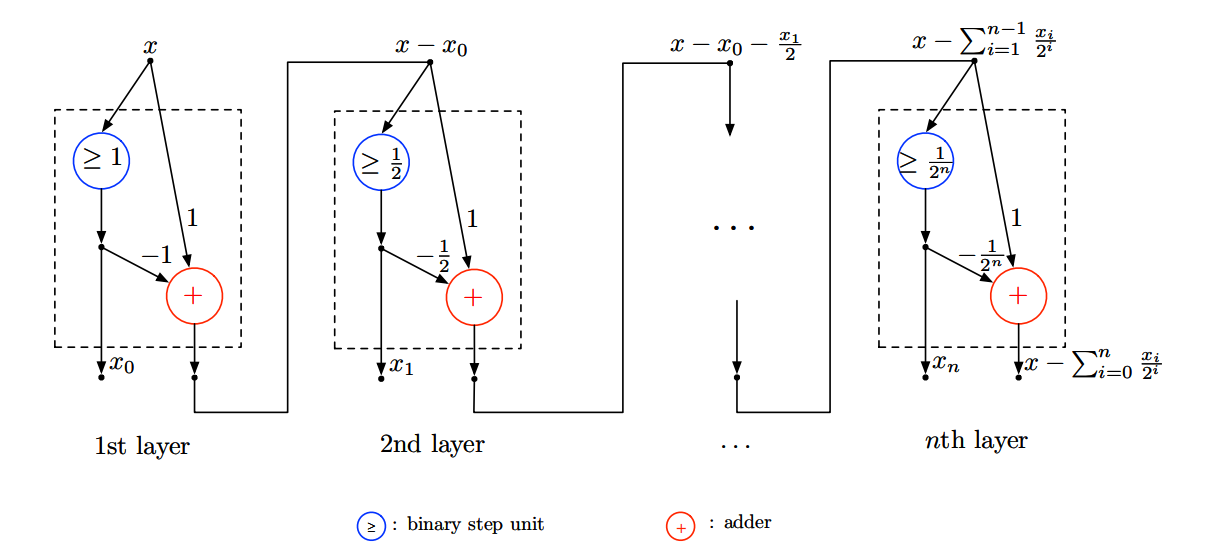

*Hint*: For each $ x \in \left[0, 1\right]$, $x$ can be denoted by its binary expansion $x=\sum_{i=0}^{∞} x_i/2^i$, where $x_i \in \{ 0, 1\}$. The above structure can be used to find $x_0,\dots, x_n$. Then we can write $\hat f(x)=f\left(\sum_{i=0}^{∞} x_i/2^i\right).$

After the proof, if we want to achieve $\epsilon$ appoximation error based on the above neural network, the number of layers $n$ has to satisfy the condition $\frac{1}{2^{n-1}}\leq \epsilon$, i.e. $n\geq \log_2 \frac{1}{\epsilon}$.

### Solution

$|f(x)-\hat f(x)| = |(\sum_{i=0}^{\infty} x_i/2^i)^2 - (\sum_{i=0}^{n} x_i/2^i)^2| = |(\sum_{i=0}^{\infty} x_i/2^i - \sum_{i=0}^{n} x_i/2^i)(\sum_{i=0}^{\infty} x_i/2^i + \sum_{i=0}^{n} x_i/2^i)| \leq 2(|\sum_{i=0}^{\infty} x_i/2^i - \sum_{i=0}^{n} x_i/2^i|)$

$|\sum_{i=0}^{\infty} x_i/2^i - \sum_{i=0}^{n} x_i/2^i| = |\sum_{i=n+1}^{\infty} x_i/2^i | \leq \frac{1}{2^n} $

Since for the worst case we can obtain the following bound:
$\sum_{i=n+1}^{\infty} x_i/2^i = \frac{\frac{1}{2^{n+1}}}{1-\frac{1}{2}} = \frac{1}{2^n} $

In result:

$|f(x)-\hat f(x)| \leq \frac{2}{2^n} = \frac{1}{2^{n-1}}$


2) Implement this neural network in any framework you like with different $n$ (for example $n = 3, 5, 10, 15$), and then plot the curve for absolute errors for different $n$. Compare the obtained plots with theoretical bound.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class NN:
    
    def layer(self,x,i):
        if x >= 2**(-i):
            out = 1
        else:
            out = 0   
        x -= 2**(-i)*out
        return out, x
    
    def true_func(self,x):
        return x**2
    
    def forward(self,inp,n_layers):
        
        out_list = []
        out,x = self.layer(inp,0)
        out_list.append(out)
        
        for i in range(1,n_layers):
            out,x = self.layer(x,i)
            out_list.append(out)
        
        result = np.sum([out_list[i]*2**(-i) for i in range(n_layers)])
        return self.true_func(result)
    
        

In [ ]:
network = NN()

x = np.linspace(0,1,20)
n_layers = np.arange(1,22)

results = np.empty((len(n_layers),len(x)))
errors = np.empty((len(n_layers),1))
upper_bound = [(1/2)**(i-1) for i in n_layers]
true_results = x**2

for i, layers in enumerate(n_layers):
    for j, x_j in enumerate(x):
        results[i,j] = network.forward(x_j,layers)
    errors[i] = np.max(np.abs(true_results-results[i]))




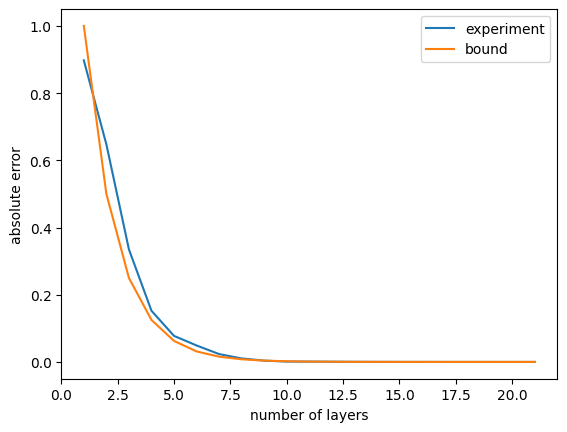

In [ ]:
plt.plot(n_layers,errors, label = 'experiment')
plt.plot(n_layers,upper_bound,label = 'bound')
plt.xlabel('number of layers')
plt.ylabel('absolute error')
plt.legend()